# 6.18. Lab - Modelling in Python

## Introduction

In this lab we will step through an end-to-end prediction process. Our data comes from the UCI Machine Learning Repository: [bank data](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

The goal is binary classification; to predict whether a customer will purchase a banking product marketed over the phone.

## Scenario

You are a data analyst working for a Portuguese bank. The bank has recently run a campaign to attempt to sell a new product to customers over the phone. The product is a term deposit, where customers deposit their money for a fixed period of time for a fixed interest rate. They want to analyze the results of this campaign to understand what makes customers likely to buy this particular product. Your job as the data analyst is to explore the data and use machine learning to build a model to predict whether a customer is likely to buy.

# <font color="red">Section 1 - exploration</font>

Take a look at the data:

In [20]:
import pandas as pd
import plotly.express as px

bank = pd.read_csv('./data/bank.csv')

bank.head(20)

age          job   marital            education  default  housing  loan  \
0    56    housemaid   married             basic.4y      0.0      0.0   0.0   
1    57     services   married          high.school      NaN      0.0   0.0   
2    37     services   married          high.school      0.0      1.0   0.0   
3    40       admin.   married             basic.6y      0.0      0.0   0.0   
4    56     services   married          high.school      0.0      0.0   1.0   
5    45     services   married             basic.9y      NaN      0.0   0.0   
6    59       admin.   married  professional.course      0.0      0.0   0.0   
7    41  blue-collar   married              unknown      NaN      0.0   0.0   
8    24   technician    single  professional.course      0.0      1.0   0.0   
9    25     services    single          high.school      0.0      1.0   0.0   
10   41  blue-collar   married              unknown      NaN      0.0   0.0   
11   25     services    single          high.school      0.0      1.0   0.0   
12   29  blue-collar    single          high.school      0.0      0.0   1.0   
13   57    housemaid  divorced             basic.4y      0.0      1.0   0.0   
14   35  blue-collar   married             basic.6y      0.0      1.0   0.0   
15   54      retired   married             basic.9y      NaN      1.0   1.0   
16   35  blue-collar   married             basic.6y      0.0      1.0   0.0   
17   46  blue-collar   married             basic.6y      NaN      1.0   1.0   
18   50  blue-collar   married             basic.9y      0.0      1.0   1.0   
19   39   management    single             basic.9y      NaN      0.0   0.0   

      contact month day_of_week  campaign  pdays  previous     poutcome  \
0   telephone   may         mon         1    999         0  nonexistent   
1   telephone   may         mon         1    999         0  nonexistent   
2   telephone   may         mon         1    999         0  nonexistent   
3   telephone   may         mon         1    999         0  nonexistent   
4   telephone   may         mon         1    999         0  nonexistent   
5   telephone   may         mon         1    999         0  nonexistent   
6   telephone   may         mon         1    999         0  nonexistent   
7   telephone   may         mon         1    999         0  nonexistent   
8   telephone   may         mon         1    999         0  nonexistent   
9   telephone   may         mon         1    999         0  nonexistent   
10  telephone   may         mon         1    999         0  nonexistent   
11  telephone   may         mon         1    999         0  nonexistent   
12  telephone   may         mon         1    999         0  nonexistent   
13  telephone   may         mon         1    999         0  nonexistent   
14  telephone   may         mon         1    999         0  nonexistent   
15  telephone   may         mon         1    999         0  nonexistent   
16  telephone   may         mon         1    999         0  nonexistent   
17  telephone   may         mon         1    999         0  nonexistent   
18  telephone   may         mon         1    999         0  nonexistent   
19  telephone   may         mon         1    999         0  nonexistent   

    emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0            1.1          93.994          -36.4      4.857       5191.0  0  
1            1.1          93.994          -36.4      4.857       5191.0  0  
2            1.1          93.994          -36.4      4.857       5191.0  0  
3            1.1          93.994          -36.4      4.857       5191.0  0  
4            1.1          93.994          -36.4      4.857       5191.0  0  
5            1.1          93.994          -36.4      4.857       5191.0  0  
6            1.1          93.994          -36.4      4.857       5191.0  0  
7            1.1          93.994          -36.4      4.857       5191.0  0  
8            1.1          93.994          -36.4      4.857       5191.0  0 

#### 1. Read the data dictionary to understand what the columns mean

Which column is the one we will use for prediction?

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

#### 2. Summarise the dataset at a high level

- How many rows and columns are there?
- Are there any missing values?
- Are the data types as you would expect them?

What do each of the results tell you in turn?

- There are 41,118 entries in the data set (rows), and 20 columns, 19 of which are features
- The default, housing, and loan columns have missing values
- Four of the features are not defined in the data dictionary (emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed)
- Default, housing and loan are binaries so they could be int64 but float64 should be fine

In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         32591 non-null  float64
 5   housing         40198 non-null  float64
 6   loan            40198 non-null  float64
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [57]:
bank.isnull().sum()

age                  0
job                  0
marital              0
education            0
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

#### 3. Investigate your features.

For each variable of interest you may want to:

- Investigate the spread of values
- Check for outliers
    - What do the outliers represent? Are they meaningful or are they more likely to be errors?
    - Are the outliers "different" from our main population in a meaningful way?
    - Do the outliers represent customers that you would still want to make predictions on?

In [65]:
# 894 people subscribed to a term deposit and were a success in the previous campaign

bank[['y','poutcome']].value_counts()

y  poutcome   
0  nonexistent    32422
   failure         3647
1  nonexistent     3141
   success          894
   failure          605
0  success          479
Name: count, dtype: int64

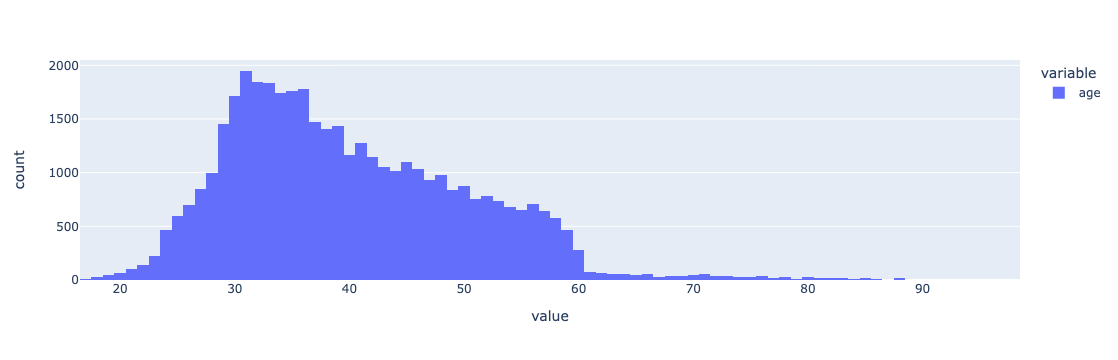

In [64]:
# most people are around 30

px.histogram(bank['age'])

In [63]:
# most people work admin jobs

bank['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

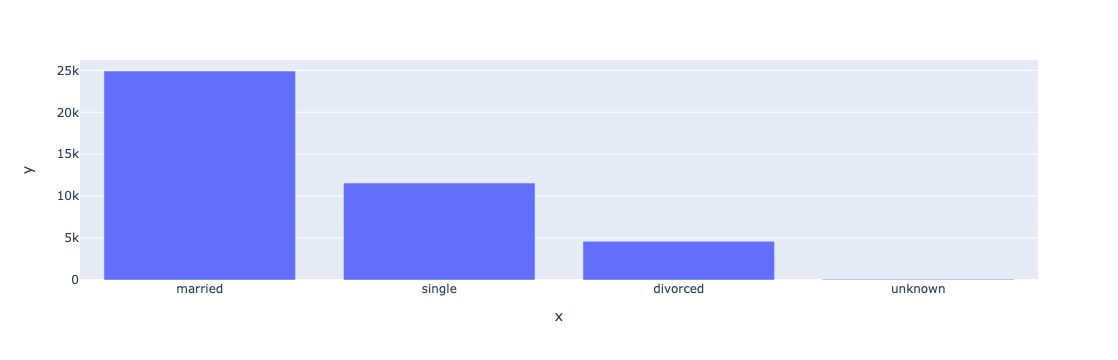

In [62]:
# most people are married

px.bar(x = bank['marital'].value_counts().index, y = bank['marital'].value_counts())

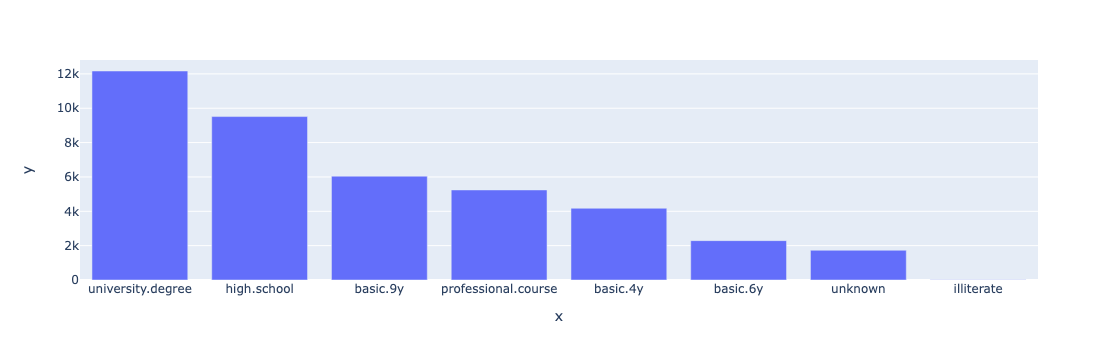

In [61]:
# most people have a university degree

px.bar(x = bank['education'].value_counts().index, y = bank['education'].value_counts())

In [66]:
bank[bank['default'].isnull()].head()

age          job  marital    education  default  housing  loan    contact  \
1    57     services  married  high.school      NaN      0.0   0.0  telephone   
5    45     services  married     basic.9y      NaN      0.0   0.0  telephone   
7    41  blue-collar  married      unknown      NaN      0.0   0.0  telephone   
10   41  blue-collar  married      unknown      NaN      0.0   0.0  telephone   
15   54      retired  married     basic.9y      NaN      1.0   1.0  telephone   

   month day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
1    may         mon         1    999         0  nonexistent           1.1   
5    may         mon         1    999         0  nonexistent           1.1   
7    may         mon         1    999         0  nonexistent           1.1   
10   may         mon         1    999         0  nonexistent           1.1   
15   may         mon         1    999         0  nonexistent           1.1   

    cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
1           93.994          -36.4      4.857       5191.0  0  
5           93.994          -36.4      4.857       5191.0  0  
7           93.994          -36.4      4.857       5191.0  0  
10          93.994          -36.4      4.857       5191.0  0  
15          93.994          -36.4      4.857       5191.0  0

In [60]:
# 20% of rows are missing data in the default column (has credit in default?)

bank['default'].isnull().value_counts('normalize')

default
False    0.791274
True     0.208726
Name: proportion, dtype: float64

In [70]:
# 54% of people have a housing loan

bank['housing'].value_counts('normalize')

housing
1.0    0.536743
0.0    0.463257
Name: proportion, dtype: float64

In [72]:
# 16% of people have a personal loan

bank['loan'].value_counts('normalize')

loan
0.0    0.844569
1.0    0.155431
Name: proportion, dtype: float64

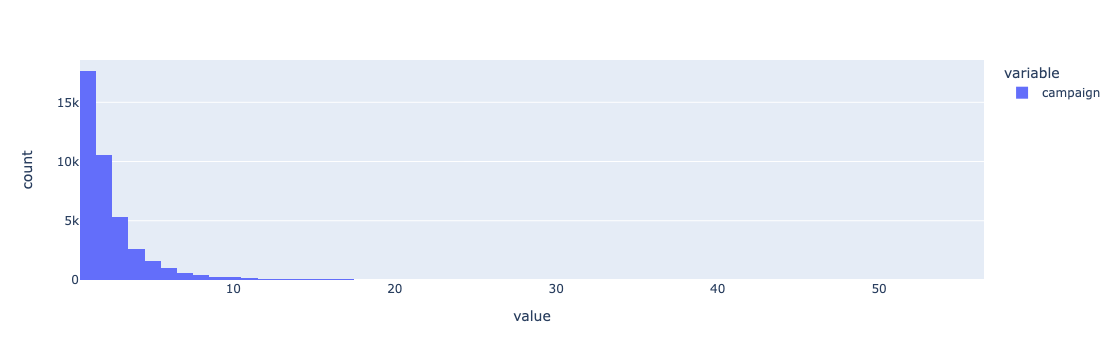

In [76]:
px.histogram(bank['campaign'])

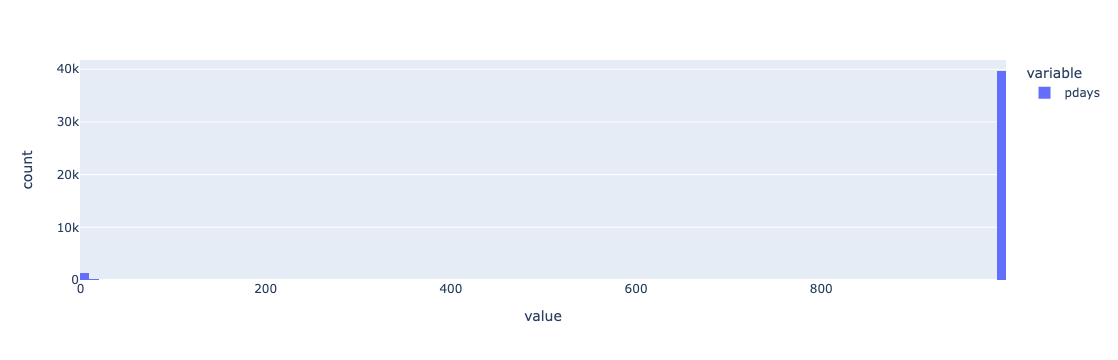

In [86]:
# Most people have not been contacted in almost 3 years
# According to the data dictionary, -1 means someone hasn't been contacted before, but it's likely that's incorrect

px.histogram(bank['pdays'])

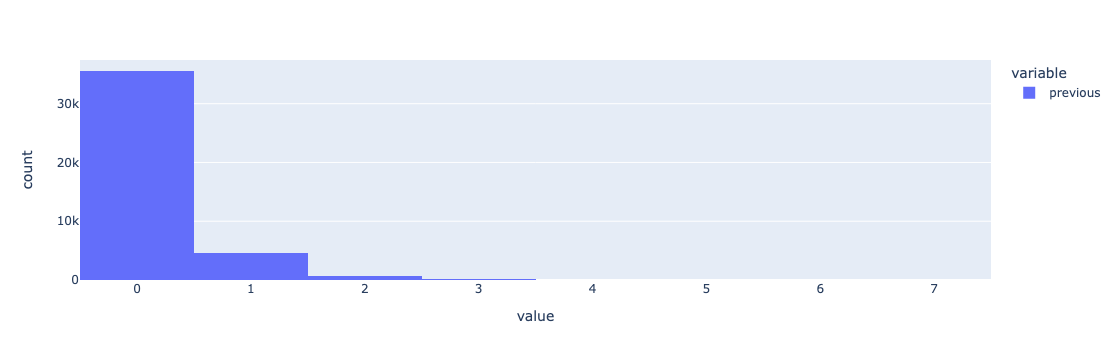

In [84]:
# most people have had 0 previous contacts

px.histogram(bank['previous'])

#### 4. Deal with outliers

Based on your answers to question 3, decide whether to drop or keep your outliers

- Not dropping any outliers, but probably won't use the 'default' column given it is missing 20%

#### 5. Investigate some of the categorical columns

First, identify which columns are categorical (including binary)

Investigate the breakdown of values of some of these columns. If you notice any odd values, investigate them and deal with them (either drop or keep them).

- Already done above

#### 6. Now explore the relationships between your potential features and the target

The sorts of questions you are interested in are "how does the distribution of our target vary across values of our features?" - in this case "how does the % of people who purchased the product vary by age/job/education level etc.?"

First, focus on the numeric columns.

You may decide to group your continuous columns (like age) into buckets and calculate the % of people who purchased the product. A trick you can use here is that taking the average of a binary column gives you the % of 1s in that column.

What do you conclude about the relationship between your columns and the likelihood of purchasing the product?

In [88]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         32591 non-null  float64
 5   housing         40198 non-null  float64
 6   loan            40198 non-null  float64
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

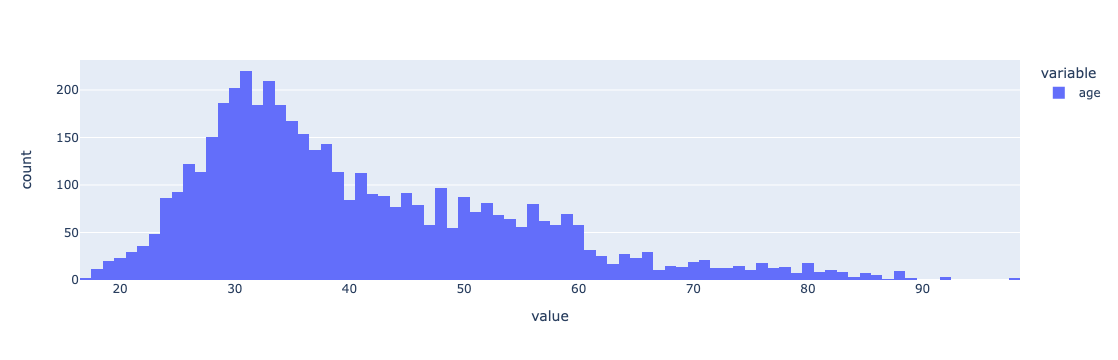

In [119]:
# create purchasers df and look at age

purchasers = bank[bank['y'] == 1]

px.histogram(purchasers['age'])

In [120]:
# make age groups

import numpy as np

bins = [0,20,30,40,50,60,70,80,np.inf]
labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']

purchasers.loc[:, 'age_group'] = pd.cut(purchasers['age'], bins = bins, labels = labels)

# purchasers.drop('age_groups', axis = 1, inplace = True)

purchasers

/var/folders/sh/jh2pg0n51g3fmnvl7t_cp_100000gp/T/ipykernel_77550/2429139097.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



age           job   marital            education  default  housing  \
75      41   blue-collar  divorced             basic.4y      NaN      1.0   
83      49  entrepreneur   married    university.degree      NaN      1.0   
88      49    technician   married             basic.9y      0.0      0.0   
129     41    technician   married  professional.course      NaN      1.0   
139     45   blue-collar   married             basic.9y      NaN      1.0   
...    ...           ...       ...                  ...      ...      ...   
41174   62       retired   married    university.degree      0.0      1.0   
41178   62       retired   married    university.degree      0.0      0.0   
41181   37        admin.   married    university.degree      0.0      1.0   
41183   73       retired   married  professional.course      0.0      1.0   
41186   44    technician   married  professional.course      0.0      0.0   

       loan    contact month day_of_week  ...  pdays  previous     poutcome  \
75      0.0  telephone   may         mon  ...    999         0  nonexistent   
83      0.0  telephone   may         mon  ...    999         0  nonexistent   
88      0.0  telephone   may         mon  ...    999         0  nonexistent   
129     0.0  telephone   may         mon  ...    999         0  nonexistent   
139     0.0  telephone   may         mon  ...    999         0  nonexistent   
...     ...        ...   ...         ...  ...    ...       ...          ...   
41174   0.0   cellular   nov         thu  ...      1         6      success   
41178   0.0   cellular   nov         thu  ...      6         3      success   
41181   0.0   cellular   nov         fri  ...    999         0  nonexistent   
41183   0.0   cellular   nov         fri  ...    999         0  nonexistent   
41186   0.0   cellular   nov         fri  ...    999         0  nonexistent   

      emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  \
75             1.1          93.994          -36.4      4.857       5191.0  1   
83             1.1          93.994          -36.4      4.857       5191.0  1   
88             1.1          93.994          -36.4      4.857       5191.0  1   
129            1.1          93.994          -36.4      4.857       5191.0  1   
139            1.1          93.994          -36.4      4.857       5191.0  1   
...            ...             ...            ...        ...          ... ..   
41174         -1.1          94.767          -50.8      1.031       4963.6  1   
41178         -1.1          94.767          -50.8      1.031       4963.6  1   
41181         -1.1          94.767          -50.8      1.028       4963.6  1   
41183         -1.1          94.767          -50.8      1.028       4963.6  1   
41186         -1.1          94.767          -50.8      1.028       4963.6  1   

       age_group  
75         40-50  
83         40-50  
88         40-50  
129        40-50  
139        40-50  
...          ...  
41174      60-70  
41178      60-70  
41181      30-40  
41183      70-80  
41186      40-50  

[4640 rows x 21 columns]

In [127]:
# see % of age groups within purchasers (ok feature)

purchasers['age_group'].value_counts('normalize')*100

age_group
30-40    34.418103
20-30    22.995690
40-50    18.038793
50-60    14.396552
60-70     4.568966
70-80     3.081897
80+       1.271552
0-20      1.228448
Name: proportion, dtype: float64

In [147]:
# realize I need to do the inverse, otherwise I'm really just looking at size of each group

# bank['age_group'] = pd.cut(bank['age'], bins = bins, labels = labels)

bank['y'].groupby(bank['age_group'], observed = False).value_counts('normalize')*100



age_group  y
0-20       0    59.285714
           1    40.714286
20-30      0    85.268535
           1    14.731465
30-40      0    90.253280
           1     9.746720
40-50      0    91.826172
           1     8.173828
50-60      0    89.346093
           1    10.653907
60-70      0    56.557377
           1    43.442623
70-80      0    52.805281
           1    47.194719
80+        0    50.420168
           1    49.579832
Name: proportion, dtype: float64

/var/folders/sh/jh2pg0n51g3fmnvl7t_cp_100000gp/T/ipykernel_77550/3713550028.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



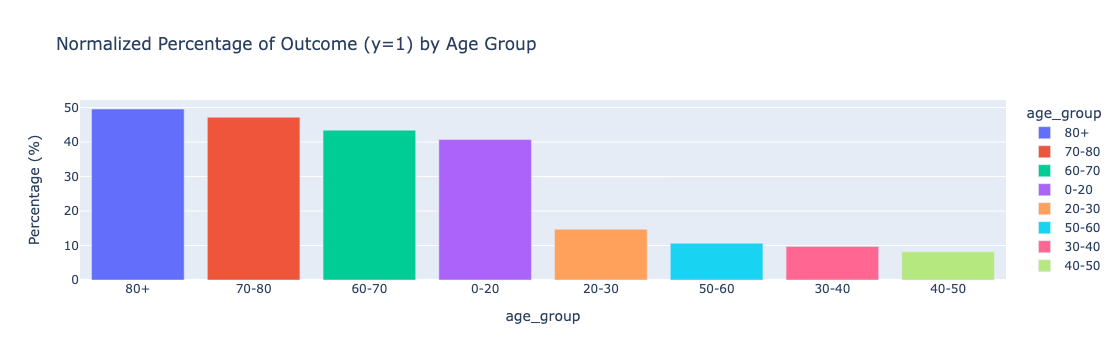

In [188]:
normalized_age = bank['y'].groupby(bank['age_group']).value_counts('normalize')*100
normalized_age = normalized_age.rename('percentage').reset_index()

filtered_age = normalized_age[normalized_age['y'] == 1].sort_values(by = 'percentage', ascending=False)

fig_age = px.bar(filtered_age, x='age_group', y='percentage', 
             color='age_group',  # Color by job (optional)
             labels={'age': 'Age Group', 'percentage': 'Percentage (%)', 'y': 'Outcome'},
             title='Normalized Percentage of Outcome (y=1) by Age Group')

fig_age.show()

In [148]:
# WRONG
# see % of people with housing loans within purchasers (not a good feature, too close to 50/50)

purchasers['housing'].mean()

0.5530553717185087

In [152]:
# RIGHT
# see % of people who purchased within housing loan binary [not a good feature, people with and without housing loans converted at the same rate]

bank['y'].groupby(bank['housing']).value_counts('normalize')*100

housing  y
0.0      0    89.120395
         1    10.879605
1.0      0    88.380608
         1    11.619392
Name: proportion, dtype: float64

In [200]:
bank['y'].groupby(bank['loan']).value_counts('normalize')*100

loan  y
0.0   0    88.659794
      1    11.340206
1.0   0    89.068502
      1    10.931498
Name: proportion, dtype: float64

In [153]:
# WRONG
# see how many times people who purchased have been contacted during this campaign (frequency, good feature)

purchasers['campaign'].value_counts('normalize')*100

campaign
1     49.568966
2     26.099138
3     12.370690
4      5.366379
5      2.586207
6      1.616379
7      0.818966
8      0.366379
9      0.366379
10     0.258621
11     0.258621
17     0.086207
13     0.086207
12     0.064655
15     0.043103
23     0.021552
14     0.021552
Name: proportion, dtype: float64

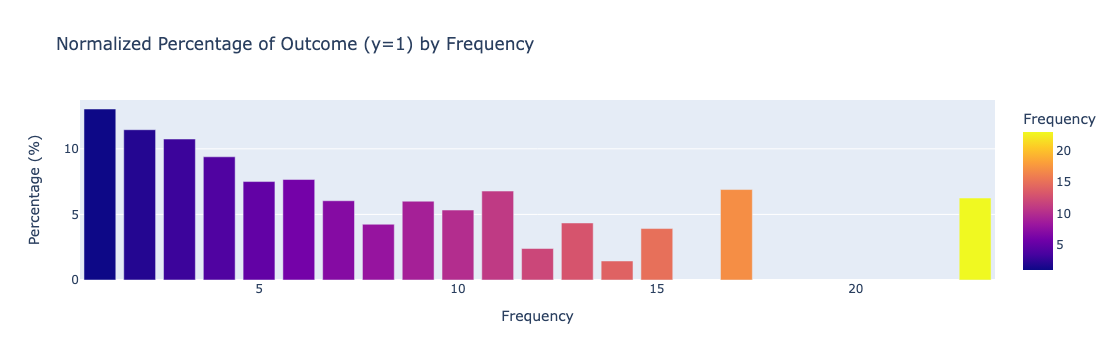

In [194]:
# RIGHT
# see % of people who purchased within campaign frequency

normalized_frequency = bank['y'].groupby(bank['campaign']).value_counts('normalize')*100
normalized_frequency = normalized_frequency.rename('percentage').reset_index()

filtered_frequency = normalized_frequency[normalized_frequency['y'] == 1].sort_values(by = 'percentage', ascending=False)

fig_frequency = px.bar(filtered_frequency, x='campaign', y='percentage', 
             color='campaign',  # Color by job (optional)
             labels={'campaign': 'Frequency', 'percentage': 'Percentage (%)', 'y': 'Outcome'},
             title='Normalized Percentage of Outcome (y=1) by Frequency')

fig_frequency.show()


#### 7. Now investigate the relationship between the categorical variables and the target

First, identify which columns in the data are categorical.

The question we care about again is "how does the % of customers who bought the product vary among different jobs/education levels etc.?"

In [128]:
purchasers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4640 entries, 75 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             4640 non-null   int64   
 1   job             4640 non-null   object  
 2   marital         4640 non-null   object  
 3   education       4640 non-null   object  
 4   default         4197 non-null   float64 
 5   housing         4533 non-null   float64 
 6   loan            4533 non-null   float64 
 7   contact         4640 non-null   object  
 8   month           4640 non-null   object  
 9   day_of_week     4640 non-null   object  
 10  campaign        4640 non-null   int64   
 11  pdays           4640 non-null   int64   
 12  previous        4640 non-null   int64   
 13  poutcome        4640 non-null   object  
 14  emp.var.rate    4640 non-null   float64 
 15  cons.price.idx  4640 non-null   float64 
 16  cons.conf.idx   4640 non-null   float64 
 17  euribor3m       4

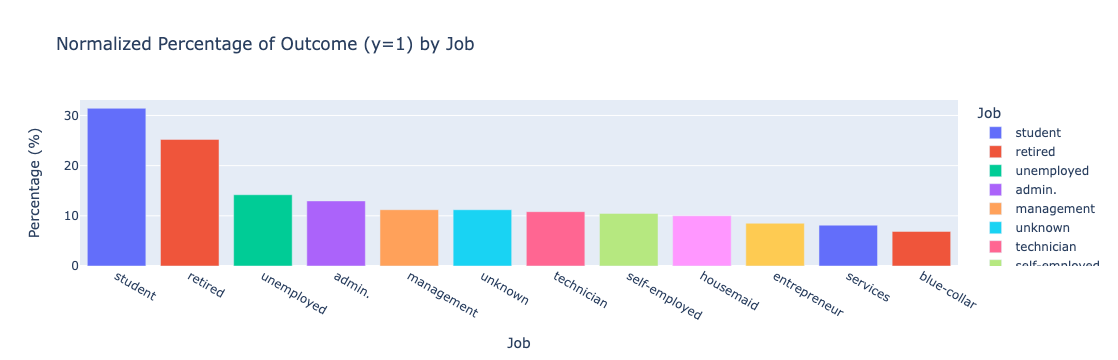

In [184]:
# bank['y'].groupby(bank['job']).value_counts('normalize') * 100

normalized_job = bank.groupby('job')['y'].value_counts(normalize=True) * 100
normalized_job = normalized_job.rename('percentage').reset_index()

filtered_job = normalized_job[normalized_job['y'] == 1].sort_values(by = 'percentage', ascending = False)

fig_job = px.bar(filtered_job, x='job', y='percentage', 
             color='job',  # Color by job (optional)
             labels={'job': 'Job', 'percentage': 'Percentage (%)', 'y': 'Outcome'},
             title='Normalized Percentage of Outcome (y=1) by Job')

fig_job.show()

In [197]:
bank['y'].groupby(bank['marital']).value_counts('normalize') * 100

marital   y
divorced  0    89.679098
          1    10.320902
married   0    89.842747
          1    10.157253
single    0    85.995851
          1    14.004149
unknown   0    85.000000
          1    15.000000
Name: proportion, dtype: float64

In [198]:
bank['y'].groupby(bank['education']).value_counts('normalize') * 100

education            y
basic.4y             0    89.750958
                     1    10.249042
basic.6y             0    91.797557
                     1     8.202443
basic.9y             0    92.175352
                     1     7.824648
high.school          0    89.164477
                     1    10.835523
illiterate           0    77.777778
                     1    22.222222
professional.course  0    88.651535
                     1    11.348465
university.degree    0    86.275477
                     1    13.724523
unknown              0    85.499711
                     1    14.500289
Name: proportion, dtype: float64

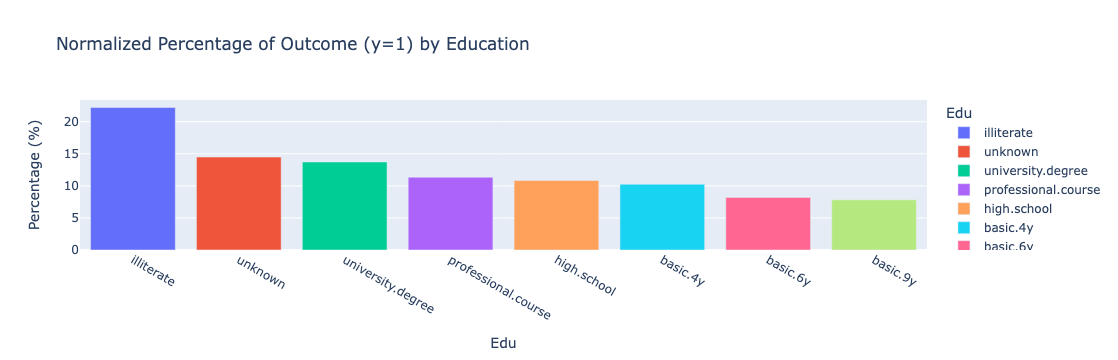

In [199]:
normalized_edu = bank.groupby('education')['y'].value_counts(normalize=True) * 100
normalized_edu = normalized_edu.rename('percentage').reset_index()

filtered_edu = normalized_edu[normalized_edu['y'] == 1].sort_values(by = 'percentage', ascending = False)

fig_edu = px.bar(filtered_edu, x='education', y='percentage', 
             color='education',  # Color by job (optional)
             labels={'education': 'Edu', 'percentage': 'Percentage (%)', 'y': 'Outcome'},
             title='Normalized Percentage of Outcome (y=1) by Education')

fig_edu.show()

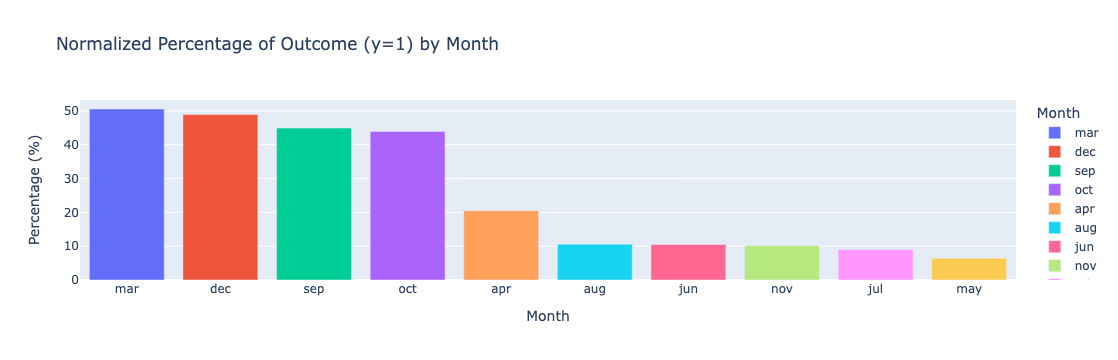

In [201]:
normalized_month = bank.groupby('month')['y'].value_counts(normalize=True) * 100
normalized_month = normalized_month.rename('percentage').reset_index()

filtered_month = normalized_month[normalized_month['y'] == 1].sort_values(by = 'percentage', ascending = False)

fig_month = px.bar(filtered_month, x='month', y='percentage', 
             color='month',
             labels={'month': 'Month', 'percentage': 'Percentage (%)', 'y': 'Outcome'},
             title='Normalized Percentage of Outcome (y=1) by Month')

fig_month.show()

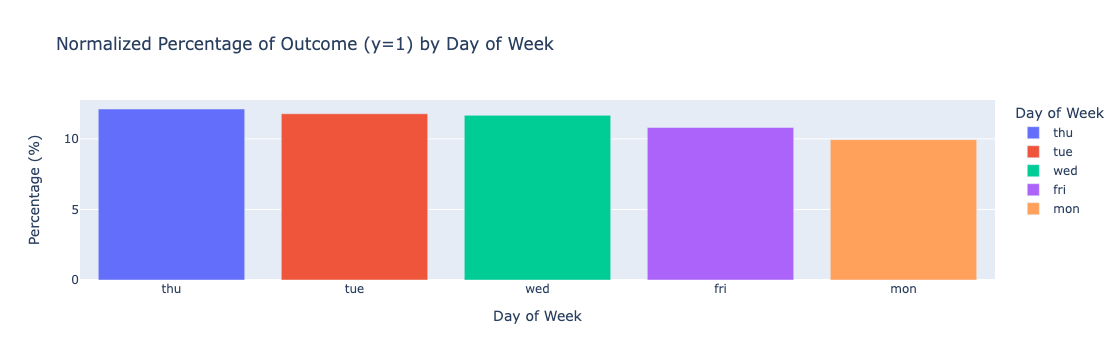

In [202]:
normalized_day_of_week = bank.groupby('day_of_week')['y'].value_counts(normalize=True) * 100
normalized_day_of_week = normalized_day_of_week.rename('percentage').reset_index()

filtered_day_of_week = normalized_day_of_week[normalized_day_of_week['y'] == 1].sort_values(by = 'percentage', ascending = False)

fig_day_of_week = px.bar(filtered_day_of_week, x='day_of_week', y='percentage', 
             color='day_of_week',
             labels={'day_of_week': 'Day of Week', 'percentage': 'Percentage (%)', 'y': 'Outcome'},
             title='Normalized Percentage of Outcome (y=1) by Day of Week')

fig_day_of_week.show()

#### 8. Using the results of your EDA choose your features to put into your first predictive model

A "good" feature is one which contains *variance of the outcome*. For example, if people in all age groups bought the product at around the same %, age would **not** be a good feature, because it doesn't get us closer to separating those that bought from those that didn't.

Feature selection:
- Will start out not using "education". Even though "illiterate" has a high conversion % as compared to the rest of the categories, the number of people in the "illiterate" category is very small (<2k)
- Will also start out not using "marital" because there is not much variance in the outcome (10% - 15%)
- Will not use "housing" or "loan" due to low variance (10% - 11%)
- Will not use "day of week" because there is not much variance in the outcome (9.9% - 12.1%)

  ----

- Will use "job" because "retired" and "student" stand out
- Will also use "campaign" aka "frequency" due to high variance (1.4% - 13%)
- Will use "age_group" because older and younger people stand out, which aligns with the "job" insight
- Will use "month" due to high variance (6.4% - 50.5%)

# <font color="red">Part 2 - our first model</font>

It's time to build your first predictive model.

#### 1. First, do any transformations required to our data
    
- If you haven't already, based on your EDA results drop any values you don't wish to use (outliers, certain categories)
- For your categorical column(s) convert the columns to a dummy (one-hot encoded) representation if you wish to use them

Once you convert the categories to dummies, drop one of the columns per category. Remember this acts as a "reference", as your "default" category. Typically we choose the category containing the most values.

In [340]:
df_dummies = pd.get_dummies(bank, columns = ['job', 'age_group', 'month', 'marital', 'education', 'contact', 'day_of_week', 'poutcome'], prefix = '', prefix_sep = '', dtype = int)
df_dummies.drop('admin.', axis = 1, inplace = True)
df_dummies.drop('50-60', axis = 1, inplace = True)
df_dummies.drop('aug', axis = 1, inplace = True)
df_dummies.drop('unknown', axis = 1, inplace = True)
df_dummies.drop('basic.6y', axis = 1, inplace = True)
df_dummies.drop('telephone', axis = 1, inplace = True)
df_dummies.drop('fri', axis = 1, inplace = True)
df_dummies.drop('success', axis = 1, inplace = True)

In [341]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 55 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  41188 non-null  int64  
 1   default              32591 non-null  float64
 2   housing              40198 non-null  float64
 3   loan                 40198 non-null  float64
 4   campaign             41188 non-null  int64  
 5   pdays                41188 non-null  int64  
 6   previous             41188 non-null  int64  
 7   emp.var.rate         41188 non-null  float64
 8   cons.price.idx       41188 non-null  float64
 9   cons.conf.idx        41188 non-null  float64
 10  euribor3m            41188 non-null  float64
 11  nr.employed          41188 non-null  float64
 12  y                    41188 non-null  int64  
 13  blue-collar          41188 non-null  int64  
 14  entrepreneur         41188 non-null  int64  
 15  housemaid            41188 non-null 

#### 2. Create the necessary `X_train`, `X_test`, `y_train` and `y_test` variables using the features you chose above.

Make sure `X_train` and `X_test` only include the features you chose (including the dummy variables for categorical features).

In [218]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

In [243]:
X = df_dummies[['student', 'retired', 'campaign', '80+', '70-80', '60-70', '0-20', 'mar', 'dec', 'sep', 'oct']]
y = df_dummies['y']

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [220]:
X_train.head()

student  retired  campaign  80+  70-80  60-70  0-20  mar  dec  sep  oct
12556        0        0         2    0      0      0     0    0    0    0    0
35451        0        0         4    0      0      0     0    0    0    0    0
30592        0        1         6    0      0      0     0    0    0    0    0
17914        0        0         5    0      0      0     0    0    0    0    0
3315         0        0         2    0      0      0     0    0    0    0    0

In [245]:
X_train.shape

(32950, 11)

#### 3. Train a classifier on the training data

In [216]:
knn = KNeighborsClassifier()

In [295]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

#### 4. Now dig into the evaluation of your first model
    
First of all, get the basic accuracy score and compare this against a baseline.
    
The baseline is "predict everything is the majority class" (in this case always predict no purchase). Our accuracy score should be higher than the % of the majority class.

In [296]:
knn.score(X_train, y_train)

0.8882245827010622

In [221]:
bank['y'].value_counts('normalize')*100

y
0    88.734583
1    11.265417
Name: proportion, dtype: float64

Baseline = 88.73%

Accuracy score = 88.82%

In [248]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [249]:
y_test

32884    0
3169     0
32206    0
9403     0
14020    0
        ..
12322    1
23440    0
29431    0
16627    1
1871     0
Name: y, Length: 8238, dtype: int64

In [297]:
accuracy_score(y_test, y_pred)

0.8833454722019908

In [251]:
recall_score(y_test, y_pred)

0.1754010695187166

#### 5. Now build and inspect the confusion matrix

- What does a false positive mean in this task? What does a false negative mean?
- Which do you have more of?
- What is the cost associated with these?

- A false positive means it was predicted that a customer would purchase, but they did not. There are 190 of these
- A false negative means it was predicted that a customer would not purchase, but they did. There are 771 of these
- A false positive in this case could cause inefficiencies as a result of marketing to people expected to purchase, but do not. That money could be spent on other customers who will purchase

In [252]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[7113,  190],
       [ 771,  164]])

In [227]:
cm_df = pd.DataFrame(cm, columns = ['pred_0', 'pred_1'], index = ['actual_0', 'actual_1'])

cm_df

pred_0  pred_1
actual_0    7113     190
actual_1     771     164

#### 6. Inspect the errors in more detail

Beyond summary accuracy metrics, you want to know how your model performed across various customers.

Your analysis should **not** be limited to the columns you used as features. If you used age for example, consider looking at how errors are distributed among marital status for example.

What you want to know is: ***is our model more/less accurate for different types of customers?***

An idea for this is to:
- create a column that denotes whether a customer was correctly predicted as wanting to purchase the product or not
- look at the distribution this column (i.e. the accuracy) among different categories (either age, job, education level etc.)

In [235]:
y_test.shape

(8238,)

In [236]:
y_pred.shape

(8238,)

In [237]:
y_train.shape

(32950,)

In [271]:
df_results = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
df_results['Correct'] = df_results['Actual'] == df_results['Predicted']
df_results = pd.concat([df_results, bank.loc[y_test.index]], axis = 1)
df_results

Actual  Predicted  Correct  age           job   marital  \
32884       0          0     True   57    technician   married   
3169        0          0     True   55       unknown   married   
32206       0          0     True   33   blue-collar   married   
9403        0          0     True   36        admin.   married   
14020       0          0     True   27     housemaid   married   
...       ...        ...      ...  ...           ...       ...   
12322       1          0    False   27      services   married   
23440       0          0     True   41    technician  divorced   
29431       0          0     True   46  entrepreneur    single   
16627       1          0    False   31        admin.    single   
1871        0          0     True   59        admin.   married   

                 education  default  housing  loan  ... pdays previous  \
32884          high.school      0.0      0.0   1.0  ...   999        1   
3169               unknown      NaN      1.0   0.0  ...   999        0   
32206             basic.9y      0.0      0.0   0.0  ...   999        1   
9403           high.school      0.0      0.0   0.0  ...   999        0   
14020          high.school      0.0      1.0   0.0  ...   999        0   
...                    ...      ...      ...   ...  ...   ...      ...   
12322          high.school      NaN      0.0   0.0  ...   999        0   
23440  professional.course      0.0      0.0   0.0  ...   999        0   
29431    university.degree      0.0      1.0   1.0  ...   999        1   
16627    university.degree      0.0      1.0   0.0  ...   999        0   
1871     university.degree      0.0      1.0   0.0  ...   999        0   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx euribor3m  \
32884      failure          -1.8          92.893          -46.2     1.299   
3169   nonexistent           1.1          93.994          -36.4     4.860   
32206      failure          -1.8          92.893          -46.2     1.313   
9403   nonexistent           1.4          94.465          -41.8     4.967   
14020  nonexistent           1.4          93.918          -42.7     4.963   
...            ...           ...             ...            ...       ...   
12322  nonexistent           1.4          93.918          -42.7     4.959   
23440  nonexistent           1.4          93.444          -36.1     4.964   
29431      failure          -1.8          93.075          -47.1     1.405   
16627  nonexistent           1.4          93.918          -42.7     4.963   
1871   nonexistent           1.1          93.994          -36.4     4.855   

       nr.employed  y  age_group  
32884       5099.1  0      50-60  
3169        5191.0  0      50-60  
32206       5099.1  0      30-40  
9403        5228.1  0      30-40  
14020       5228.1  0      20-30  
...            ... ..        ...  
12322       5228.1  1      20-30  
23440       5228.1  0      40-50  
29431       5099.1  0      40-50  
16627       5228.1  1      30-40  
1871        5191.0  0      50-60  

[8238 rows x 24 columns]

In [264]:
df_results.groupby('marital')['Correct'].value_counts('normalize')

marital   Correct
divorced  True       0.899886
          False      0.100114
married   True       0.895788
          False      0.104212
single    True       0.849664
          False      0.150336
unknown   True       0.736842
          False      0.263158
Name: proportion, dtype: float64

The model does better when the marital status is known

In [265]:
df_results.groupby('age_group')['Correct'].value_counts('normalize')

/var/folders/sh/jh2pg0n51g3fmnvl7t_cp_100000gp/T/ipykernel_77550/4228933862.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



age_group  Correct
0-20       False      0.625000
           True       0.375000
20-30      True       0.856045
           False      0.143955
30-40      True       0.905925
           False      0.094075
40-50      True       0.908610
           False      0.091390
50-60      True       0.872510
           False      0.127490
60-70      True       0.521739
           False      0.478261
70-80      True       0.571429
           False      0.428571
80+        False      0.518519
           True       0.481481
Name: proportion, dtype: float64

/var/folders/sh/jh2pg0n51g3fmnvl7t_cp_100000gp/T/ipykernel_77550/3902996504.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



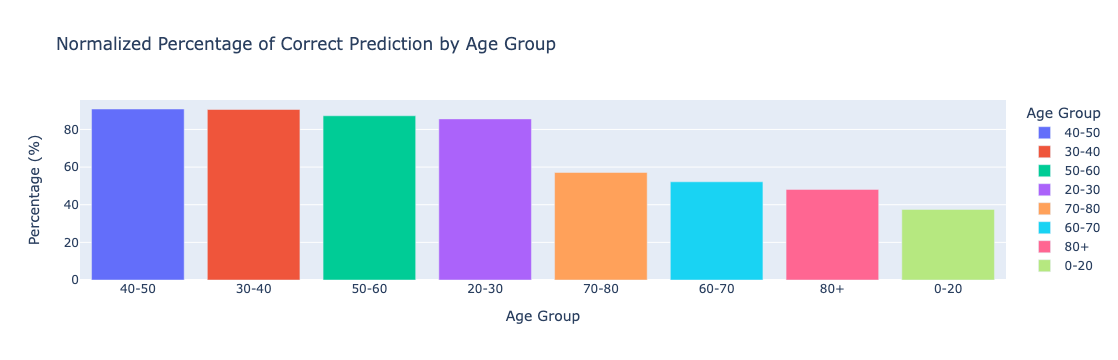

In [279]:
normalized_age_group_results = df_results.groupby('age_group')['Correct'].value_counts(normalize=True) * 100
normalized_age_group_results = normalized_age_group_results.rename('percentage').reset_index()
normalized_age_group_results

filtered_age_group_results= normalized_age_group_results[normalized_age_group_results['Correct'] == True].sort_values(by = 'percentage', ascending = False)
filtered_age_group_results

fig_age_group_results = px.bar(filtered_age_group_results, x='age_group', y='percentage', 
             color='age_group',
             labels={'age_group': 'Age Group', 'percentage': 'Percentage (%)', 'y': 'Outcome'},
             title='Normalized Percentage of Correct Prediction by Age Group')

fig_age_group_results.show()

The model does not do well with the 0-20 age group, which is not ideal since this is the age group that converts at 41%

Stretch: show y == 1 % as clustered bar and / or show number of instances in each category to see if size of category correlates to better performance

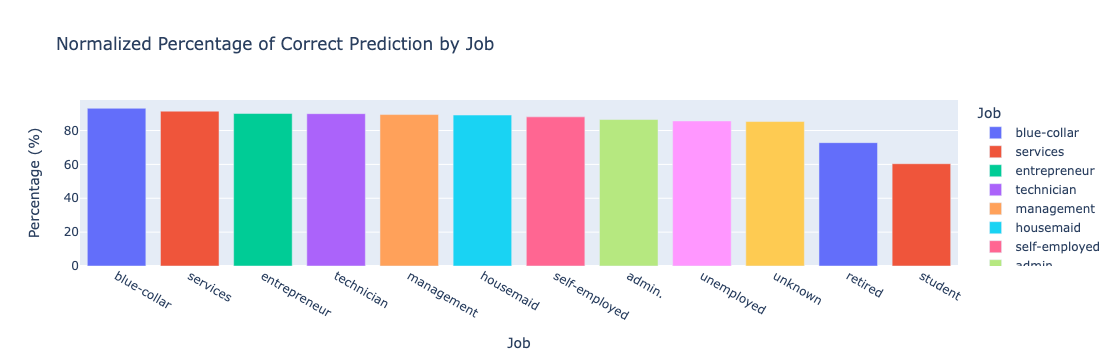

In [282]:
normalized_job_results = df_results.groupby('job')['Correct'].value_counts(normalize=True) * 100
normalized_job_results = normalized_job_results.rename('percentage').reset_index()
normalized_job_results

filtered_job_results= normalized_job_results[normalized_job_results['Correct'] == True].sort_values(by = 'percentage', ascending = False)
# filtered_job_results

fig_job_results = px.bar(filtered_job_results, x='job', y='percentage', 
             color='job',
             labels={'job': 'Job', 'percentage': 'Percentage (%)', 'y': 'Outcome'},
             title='Normalized Percentage of Correct Prediction by Job')

fig_job_results.show()

Again the model does worse on retired and student, which are the two categories with the highest conversion rate and are two of the categories the model was trained on

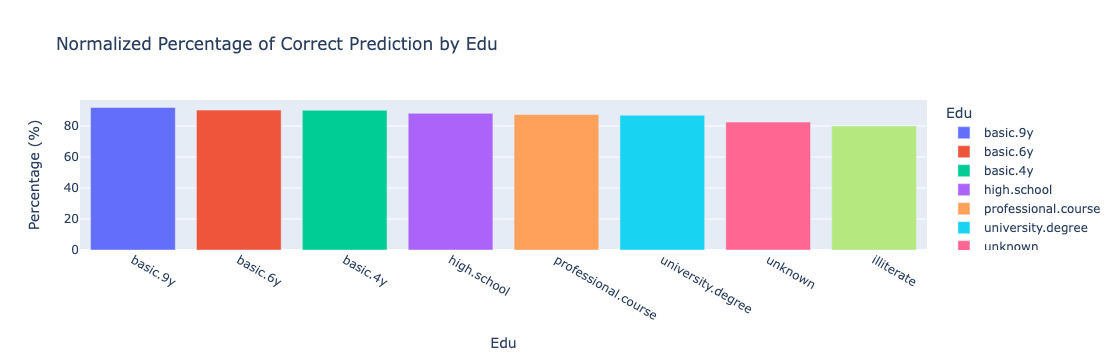

In [283]:
normalized_edu_results = df_results.groupby('education')['Correct'].value_counts(normalize=True) * 100
normalized_edu_results = normalized_edu_results.rename('percentage').reset_index()
# normalized_edu_results

filtered_edu_results= normalized_edu_results[normalized_edu_results['Correct'] == True].sort_values(by = 'percentage', ascending = False)
# filtered_job_results

fig_edu_results = px.bar(filtered_edu_results, x='education', y='percentage', 
             color='education',
             labels={'education': 'Edu', 'percentage': 'Percentage (%)', 'y': 'Outcome'},
             title='Normalized Percentage of Correct Prediction by Edu')

fig_edu_results.show()

Not a ton of variance here, 80-92%

#### 7. Build your second model

Now try to change something based on the process and results so far, and inspect the accuracy and confusion matrix again

- If you are happy with your features, you could tweak some parameters in your classifier
- If you had some additional features you thought may be useful, try adding them
- BONUS: you could even *create* new features based on your EDA!

In [406]:
X_v2 = df_dummies.drop(['y', 'default', 'housing', 'loan'], axis=1)
y_v2 = df_dummies['y']

In [407]:
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(X_v2, y_v2, test_size = 0.2, random_state=42)

In [408]:
knn_v2 = KNeighborsClassifier()

In [409]:
knn_v2.fit(X_train_v2, y_train_v2)

KNeighborsClassifier()

In [410]:
knn_v2.score(X_train_v2, y_train_v2)

0.9144764795144158

In [379]:
scores = []

for k in range(1, 11):
    for w in ['uniform', 'distance']:
        knn_params = KNeighborsClassifier(n_neighbors=k, weights=w)
        knn_params.fit(X_train_v2, y_train_v2)
        scores.append([k,w,knn_params.score(X_train_v2, y_train_v2)])

scores

[[1, 'uniform', 0.9867678300455235],
 [1, 'distance', 0.9867678300455235],
 [2, 'uniform', 0.9249165402124431],
 [2, 'distance', 0.9877996965098634],
 [3, 'uniform', 0.9239757207890743],
 [3, 'distance', 0.9879817905918058],
 [4, 'uniform', 0.9145371775417299],
 [4, 'distance', 0.9880424886191199],
 [5, 'uniform', 0.9144764795144158],
 [5, 'distance', 0.988072837632777],
 [6, 'uniform', 0.9111077389984825],
 [6, 'distance', 0.988072837632777],
 [7, 'uniform', 0.9098330804248862],
 [7, 'distance', 0.988072837632777],
 [8, 'uniform', 0.907556904400607],
 [8, 'distance', 0.988072837632777],
 [9, 'uniform', 0.9077996965098635],
 [9, 'distance', 0.988072837632777],
 [10, 'uniform', 0.9065553869499241],
 [10, 'distance', 0.988072837632777]]

In [380]:
pd.DataFrame(scores, columns = ['k', 'weights', 'training accuracy']).sort_values('training accuracy', ascending = False)

k   weights  training accuracy
19  10  distance           0.988073
17   9  distance           0.988073
15   8  distance           0.988073
13   7  distance           0.988073
11   6  distance           0.988073
9    5  distance           0.988073
7    4  distance           0.988042
5    3  distance           0.987982
3    2  distance           0.987800
1    1  distance           0.986768
0    1   uniform           0.986768
2    2   uniform           0.924917
4    3   uniform           0.923976
6    4   uniform           0.914537
8    5   uniform           0.914476
10   6   uniform           0.911108
12   7   uniform           0.909833
16   9   uniform           0.907800
14   8   uniform           0.907557
18  10   uniform           0.906555

In [381]:
knn_best = KNeighborsClassifier(n_neighbors=10, weights='distance')

In [385]:
knn_best.fit(X_train_v2, y_train_v2)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [386]:
knn_best.score(X_train_v2, y_train_v2)

0.988072837632777

In [390]:
y_pred_best = knn_best.predict(X_test_v2)

In [391]:
accuracy_score(y_test_v2, y_pred_best)

0.884316581694586

In [394]:
recall_score(y_test_v2, y_pred_best)

0.2909090909090909

In [396]:
cm_v2 = confusion_matrix(y_test_v2, y_pred_best)
cm_v2

array([[7013,  290],
       [ 663,  272]])

In [398]:
cm_df_v2 = pd.DataFrame(cm_v2, columns = ['pred_0', 'pred_1'], index = ['actual_0', 'actual_1'])

cm_df_v2

pred_0  pred_1
actual_0    7013     290
actual_1     663     272

In [415]:
cm_df

pred_0  pred_1
actual_0    7113     190
actual_1     771     164

In [411]:
df_results_v2 = pd.DataFrame({'Actual' : y_test_v2, 'Predicted' : y_pred_best})
df_results_v2['Correct'] = df_results_v2['Actual'] == df_results_v2['Predicted']
df_results_v2 = pd.concat([df_results_v2, bank.loc[y_test.index]], axis = 1)
df_results_v2

Actual  Predicted  Correct  age           job   marital  \
32884       0          0     True   57    technician   married   
3169        0          0     True   55       unknown   married   
32206       0          0     True   33   blue-collar   married   
9403        0          0     True   36        admin.   married   
14020       0          0     True   27     housemaid   married   
...       ...        ...      ...  ...           ...       ...   
12322       1          0    False   27      services   married   
23440       0          0     True   41    technician  divorced   
29431       0          0     True   46  entrepreneur    single   
16627       1          0    False   31        admin.    single   
1871        0          0     True   59        admin.   married   

                 education  default  housing  loan  ... pdays previous  \
32884          high.school      0.0      0.0   1.0  ...   999        1   
3169               unknown      NaN      1.0   0.0  ...   999        0   
32206             basic.9y      0.0      0.0   0.0  ...   999        1   
9403           high.school      0.0      0.0   0.0  ...   999        0   
14020          high.school      0.0      1.0   0.0  ...   999        0   
...                    ...      ...      ...   ...  ...   ...      ...   
12322          high.school      NaN      0.0   0.0  ...   999        0   
23440  professional.course      0.0      0.0   0.0  ...   999        0   
29431    university.degree      0.0      1.0   1.0  ...   999        1   
16627    university.degree      0.0      1.0   0.0  ...   999        0   
1871     university.degree      0.0      1.0   0.0  ...   999        0   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx euribor3m  \
32884      failure          -1.8          92.893          -46.2     1.299   
3169   nonexistent           1.1          93.994          -36.4     4.860   
32206      failure          -1.8          92.893          -46.2     1.313   
9403   nonexistent           1.4          94.465          -41.8     4.967   
14020  nonexistent           1.4          93.918          -42.7     4.963   
...            ...           ...             ...            ...       ...   
12322  nonexistent           1.4          93.918          -42.7     4.959   
23440  nonexistent           1.4          93.444          -36.1     4.964   
29431      failure          -1.8          93.075          -47.1     1.405   
16627  nonexistent           1.4          93.918          -42.7     4.963   
1871   nonexistent           1.1          93.994          -36.4     4.855   

       nr.employed  y  age_group  
32884       5099.1  0      50-60  
3169        5191.0  0      50-60  
32206       5099.1  0      30-40  
9403        5228.1  0      30-40  
14020       5228.1  0      20-30  
...            ... ..        ...  
12322       5228.1  1      20-30  
23440       5228.1  0      40-50  
29431       5099.1  0      40-50  
16627       5228.1  1      30-40  
1871        5191.0  0      50-60  

[8238 rows x 24 columns]

/var/folders/sh/jh2pg0n51g3fmnvl7t_cp_100000gp/T/ipykernel_77550/1730016558.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



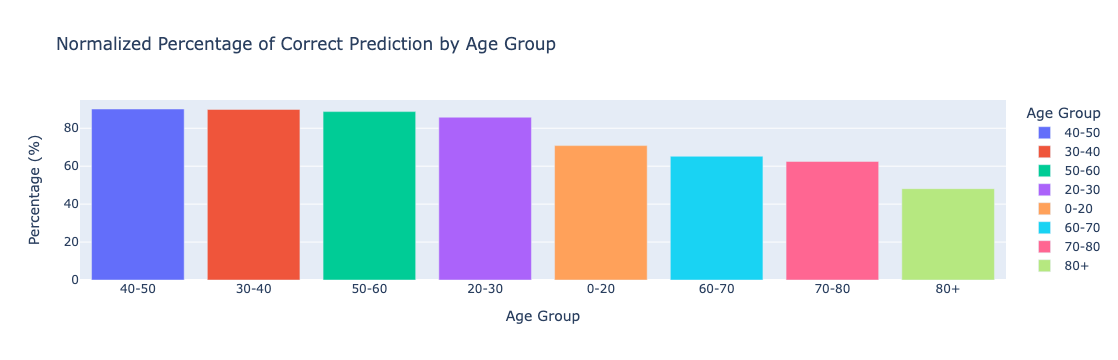

In [412]:
normalized_age_group_results_v2 = df_results_v2.groupby('age_group')['Correct'].value_counts(normalize=True) * 100
normalized_age_group_results_v2 = normalized_age_group_results_v2.rename('percentage').reset_index()
# normalized_age_group_results_v2

filtered_age_group_results_v2 = normalized_age_group_results_v2[normalized_age_group_results_v2['Correct'] == True].sort_values(by = 'percentage', ascending = False)
# filtered_age_group_results_v2

fig_age_group_results_v2 = px.bar(filtered_age_group_results_v2, x='age_group', y='percentage', 
             color='age_group',
             labels={'age_group': 'Age Group', 'percentage': 'Percentage (%)', 'y': 'Outcome'},
             title='Normalized Percentage of Correct Prediction by Age Group')

fig_age_group_results_v2.show()

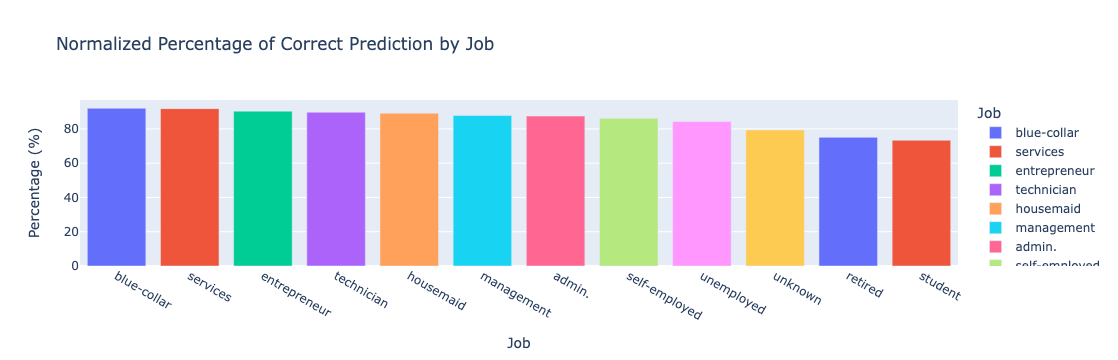

In [413]:
normalized_job_results_v2 = df_results_v2.groupby('job')['Correct'].value_counts(normalize=True) * 100
normalized_job_results_v2 = normalized_job_results_v2.rename('percentage').reset_index()
# normalized_job_results_v2

filtered_job_results_v2= normalized_job_results_v2[normalized_job_results_v2['Correct'] == True].sort_values(by = 'percentage', ascending = False)
# filtered_job_results

fig_job_results_v2 = px.bar(filtered_job_results_v2, x='job', y='percentage', 
             color='job',
             labels={'job': 'Job', 'percentage': 'Percentage (%)', 'y': 'Outcome'},
             title='Normalized Percentage of Correct Prediction by Job')

fig_job_results_v2.show()

#### 8. Finally, evaluate both models on the test set

How did your two models perform? Which was better?

In [392]:
accuracy_score(y_test, y_pred)

0.8833454722019908

In [393]:
accuracy_score(y_test_v2, y_pred_best)

0.884316581694586

The second model was better, but not by much (88.33% accuracy for v1 versus 88.43% accuracy for v2). The second model used all of the features available, and the best k neighbors and weight parameters. Is it expected to have such little improvement?

Recall on v1 was 17.54% versus 29.09% on v2.

The number of true negatives decreased from 7113 to 7013 but the number of true positives increased from 164 to 272. Overall number of true predictions only increased by 8.